# Human Activity Segmentation Challenge Data Exploration
In this notebook, we explore the challenge data sets.

In [55]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from utils import load_data, load_master_data, visualize_activity_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, we load the labelled 250 time series (TS) as a pandas DataFrame. Each row corresponds to a twelve-dimensional TS and every column contains a channel of sensor data or label information.

In [56]:
df = load_master_data()
df.head()

,ts_id,ts_challenge_id,group,subject,routine,change_points,activities,split,x-acc,y-acc,z-acc,x-gyro,y-gyro,z-gyro,x-mag,y-mag,z-mag,lat,lon,speed
0,0,125,indoor,1,1,"[1461, 2952, 4473, 5022, 6460]","[jumping jacks, downtoplank, jumping jacks, re...",private,"[0.406, 0.7786, 0.70785, 0.5649, 0.268, -0.035...","[-0.4804, -0.19365, 0.4704, 0.6985, 0.45065, 0...","[1.775, 2.5445, 2.3076499999999998, 1.85993333...","[-0.2425, -0.1857, -0.0446, 0.0733, -0.0122, -...","[1.2022, 1.204, 1.2584, 1.4465, 1.6316, 1.5009...","[-0.0538, -0.0324, 0.0147, 0.0568, 0.0531, -0....","[-24.9, -23.4, -23.4, -23.4, -21.3, -21.3, -21...","[60.3, 62.0, 62.0, 62.0, 61.2, 61.2, 61.2, 62....","[-24.4, -26.1, -26.1, -26.1, -26.9, -26.9, -26...",[],[],[]
1,1,140,indoor,1,1,"[772, 2056, 3521, 4835, 5283, 6893]","[rest, plank, sit ups, plank, rest, jumping ja...",public,"[-0.2274, -0.2274, 0.1261, 0.1261, 0.1261, -0....","[0.5969, 0.5969, 0.1466, 0.1466, 0.1466, 0.515...","[-0.5992, -0.5992, -0.0643, -0.0643, -0.0643, ...","[-0.15955714285714287, -0.1613, -0.10250000000...","[-0.045385714285714286, -0.0391, -0.0080599999...","[-0.1735142857142857, -0.1772, -0.195, -0.2097...","[-29.4, -28.7, -28.7, -28.7, -29.1, -29.1, -29...","[-63.5, -62.4, -62.4, -62.4, -62.7, -62.7, -62...","[-52.2, -52.4, -52.4, -52.4, -52.2, -52.2, -52...",[],[],[]
2,2,93,indoor,1,1,"[1211, 2043, 2836, 3529, 4036]","[plank, squat jump, lunges left, lunges right,...",public,"[4.8883, 4.8883, 4.8883, 4.4134, 4.4134, 4.413...","[5.4784, 5.4784, 5.4784, 5.8291, 5.8291, 5.829...","[-6.4445, -6.4445, -6.4445, -6.0946, -6.0946, ...","[0.060823076923076924, 0.08336, 0.0929, 0.2059...","[0.01392307692307692, -0.00486, -0.0012, 0.018...","[0.054430769230769234, 0.04057, 0.0391, 0.0824...","[-34.2, -34.2, -34.0, -34.0, -34.0, -34.0, -34...","[3.0, 3.0, 2.8, 2.8, 2.8, 4.3, 4.3, 4.3, 4.0, ...","[63.9, 63.9, 64.8, 64.8, 64.8, 64.9, 64.9, 64....",[],[],[]
3,3,52,indoor,1,1,"[739, 1433, 2044, 2875, 3589]","[lunges left, lunges right, rest, squat jump, ...",private,"[-1.2656, -1.2656, -1.2656, -6.6303, -6.6303, ...","[-0.5253, -0.5253, -0.5253, -0.0624, -0.0624, ...","[-3.9209, -3.9209, -3.9209, -4.8733, -4.8733, ...","[-0.47177142857142856, -0.46897142857142854, -...","[0.7421142857142857, 0.44257142857142856, 0.26...","[-0.16341428571428573, -0.4535285714285714, -0...","[-1.7, -2.9, -2.9, -2.9, -4.9, -4.9, -4.9, -5....","[76.8, 75.4, 75.4, 75.4, 74.8, 74.8, 74.8, 74....","[-5.0, -3.7, -3.7, -3.7, -1.2, -1.2, -1.2, 1.5...",[],[],[]
4,4,221,indoor,1,1,"[1506, 3033, 4477, 5348, 6805]","[hiptrust, diagonal, hiptrust, rest, diagonal,...",private,"[-0.8136, -0.8136, -0.8136, -0.1624, -0.1624, ...","[-0.1392, -0.1392, -0.1392, -1.0283, -1.0283, ...","[0.844, 0.844, 0.844, 1.1861, 1.1861, 1.1861, ...","[-0.654675, -0.7183900000000001, -0.7294, -0.7...","[-0.021399999999999995, -0.11534, -0.1124, 0.0...","[0.032975, 0.05033, 0.0452, 0.03444, 0.0851099...","[10.6, 10.6, 10.6, 11.3, 11.3, 11.3, 12.1, 12....","[-69.2, -69.2, -69.2, -64.5, -64.5, -64.5, -60...","[-50.3, -50.3, -50.3, -53.5, -53.5, -53.5, -57...",[],[],[]


Let's visualize an example time series from the data.

<Figure size 640x480 with 0 Axes>

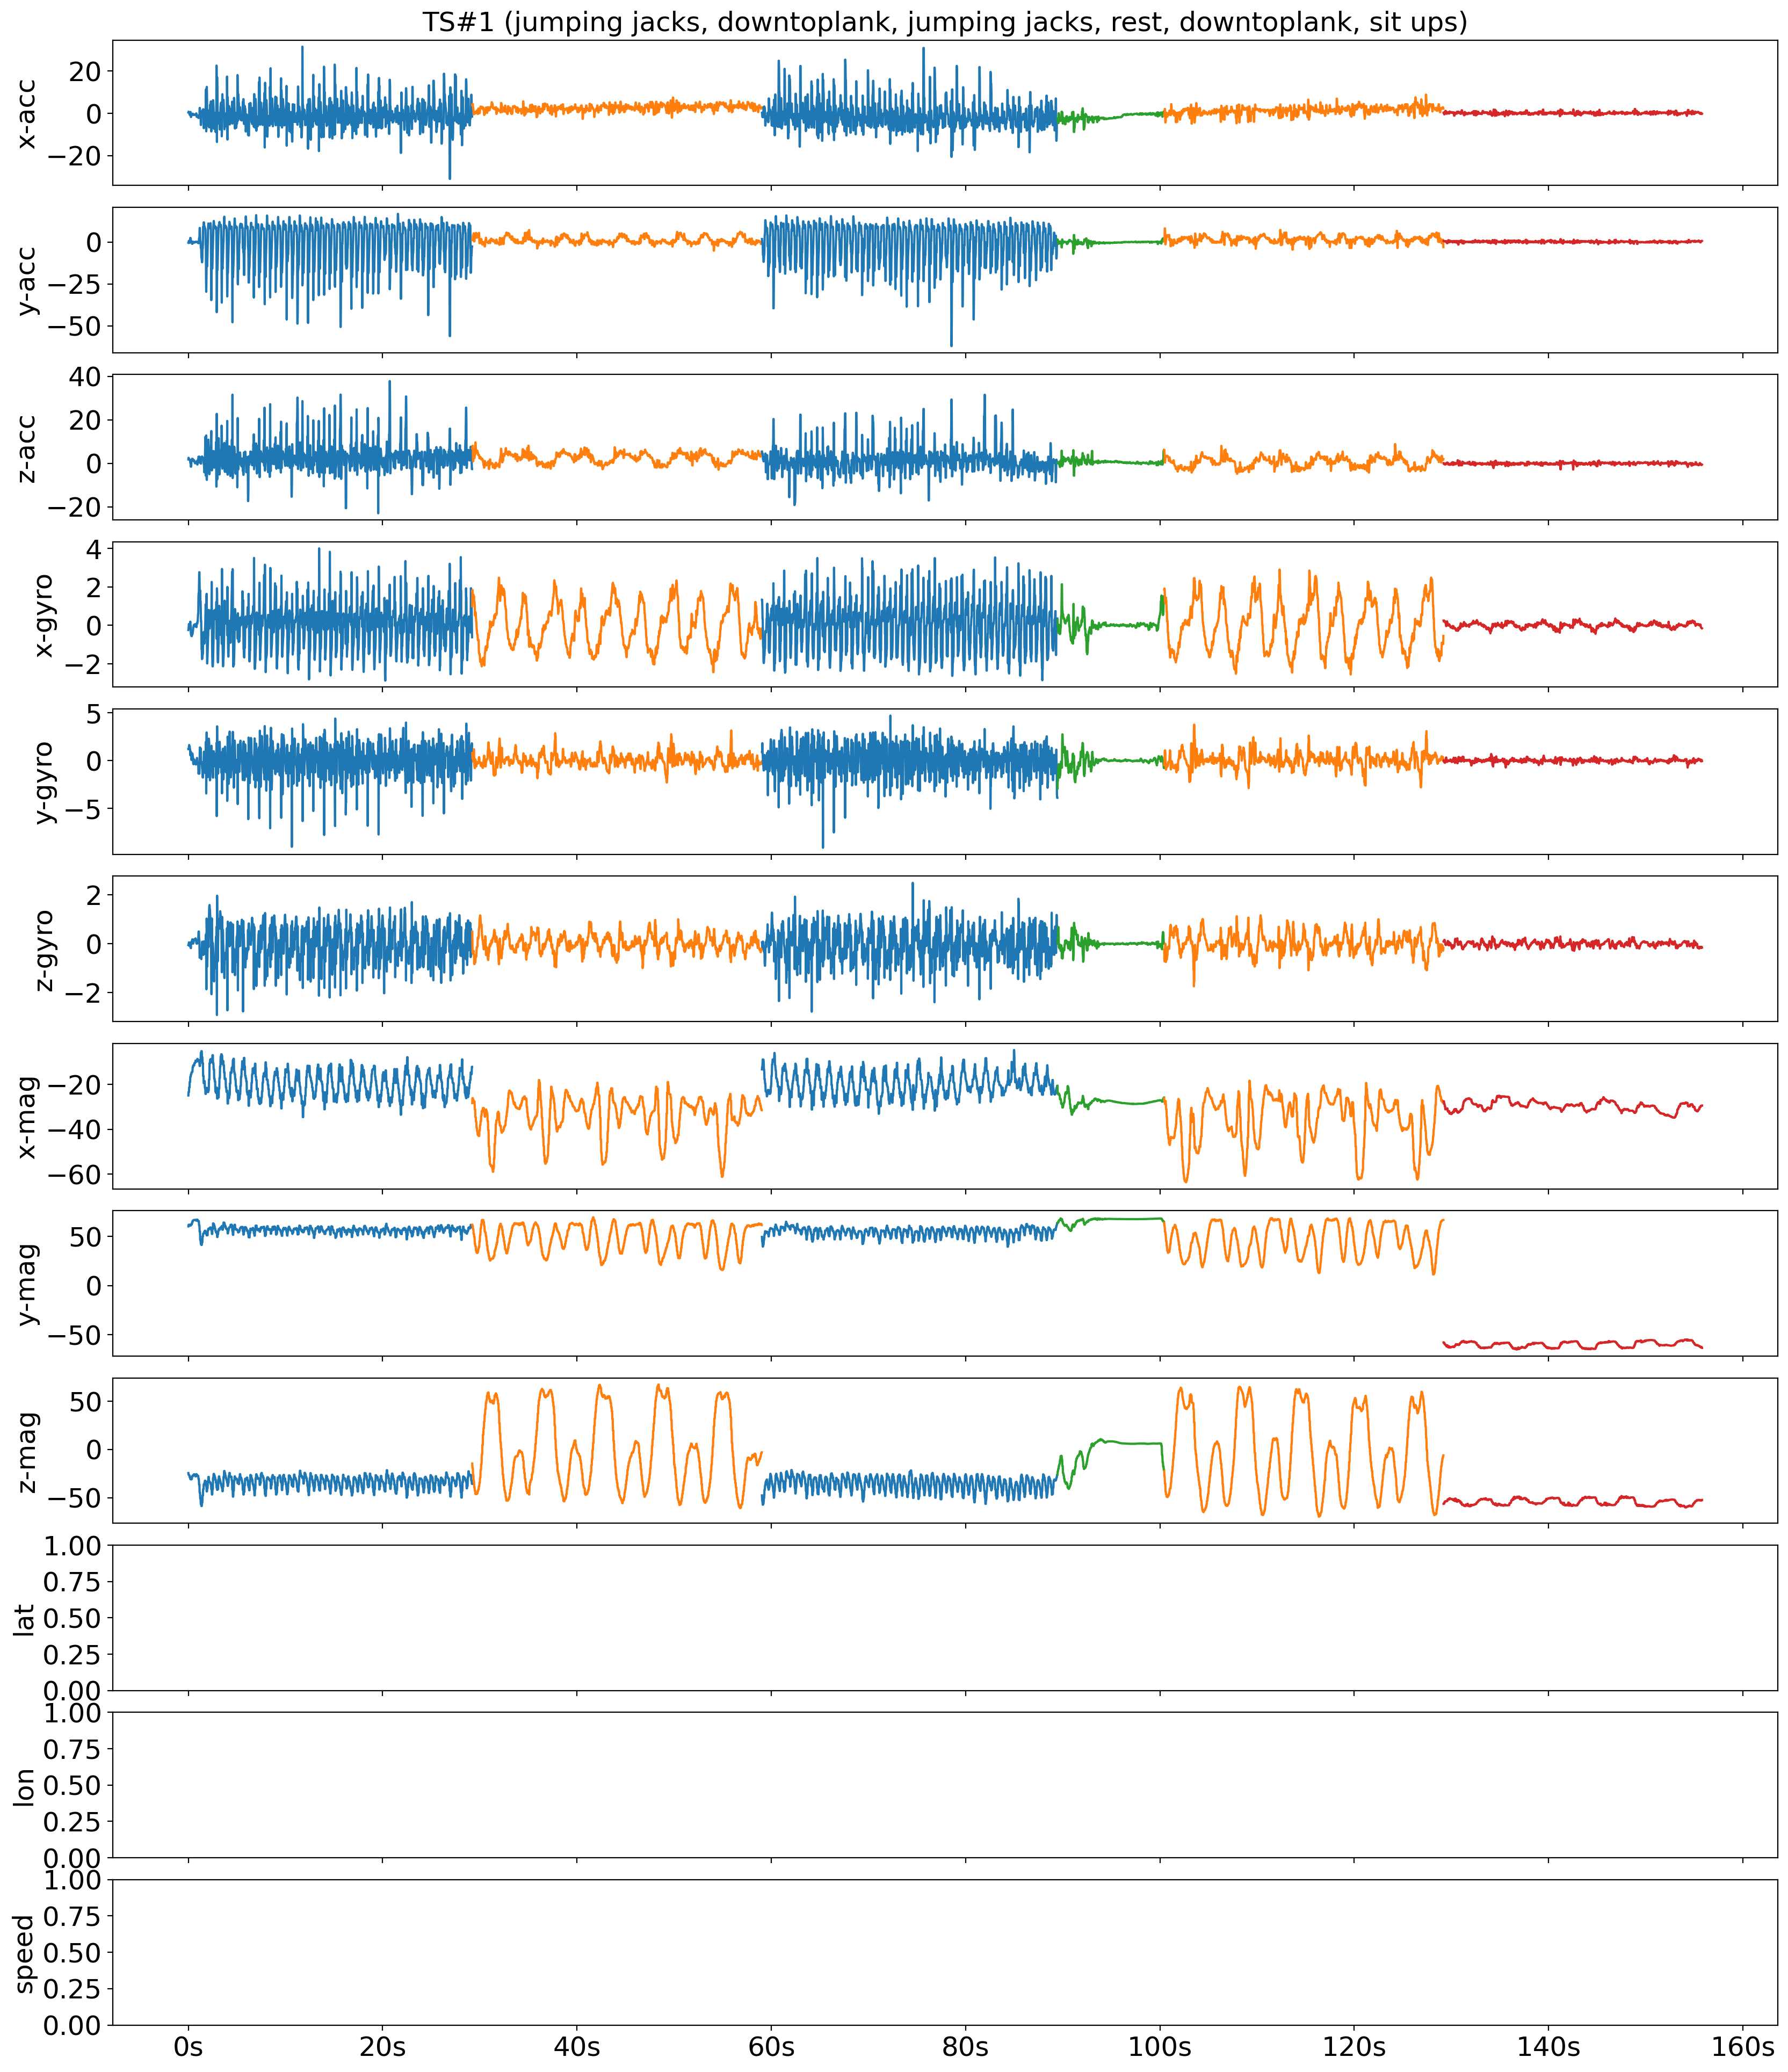

In [57]:
example = df.iloc[0] # 107
ax = visualize_activity_data(f"TS#{example.ts_id+1} ({', '.join(example.activities)})", df.columns[8:], example.iloc[8:], example.change_points, example.activities)

Let's aggregate and visualize the data by time series and activity length, amount of change points and activities.

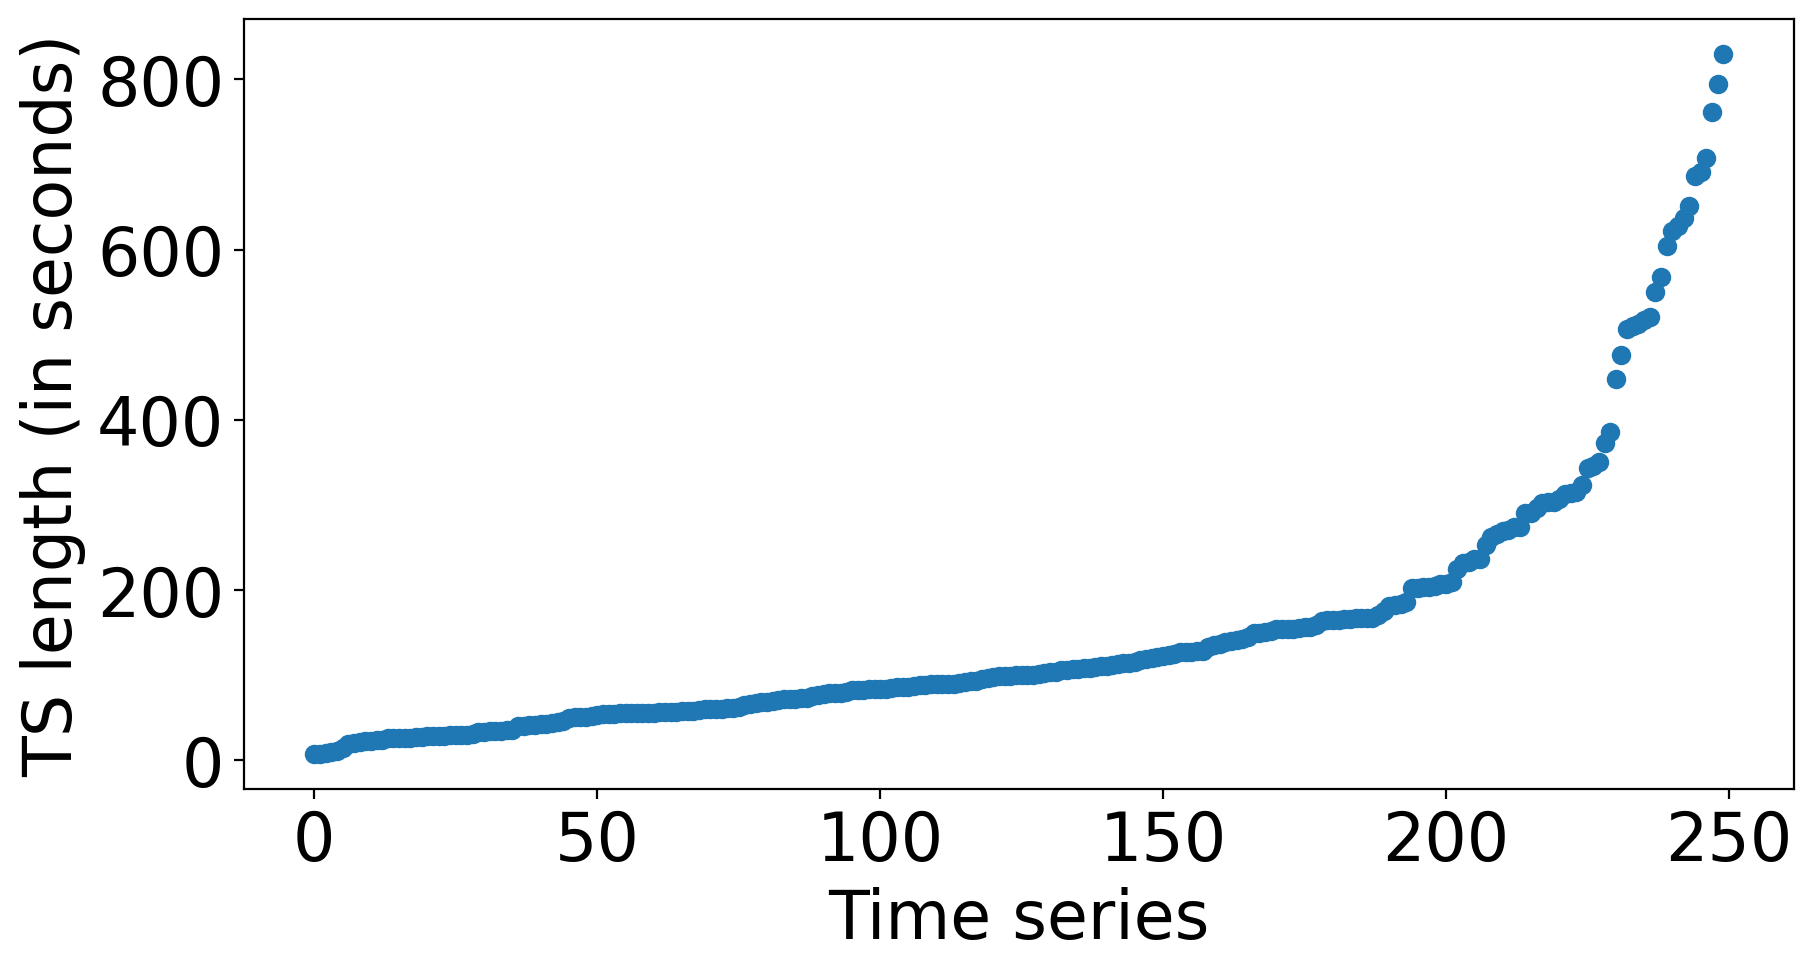

In [58]:
fontsize = 24
sample_rate = 50

_, ax = plt.subplots(1, figsize=(10,5))

tslen_arg_sorted = np.argsort(df["x-acc"].apply(len))
ax.scatter(np.arange(0, df.shape[0]), df["x-acc"].apply(len).iloc[tslen_arg_sorted])

ax.set_xlabel("Time series", fontsize=fontsize)
ax.set_ylabel("TS length (in seconds)", fontsize=fontsize)

ax.set_yticks(np.arange(0, 40_000+1, 10_000))
ax.set_yticklabels(labels=[f"{round((x / 50))}" for x in np.arange(0, 40_000+1, 10_000)])

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.show()

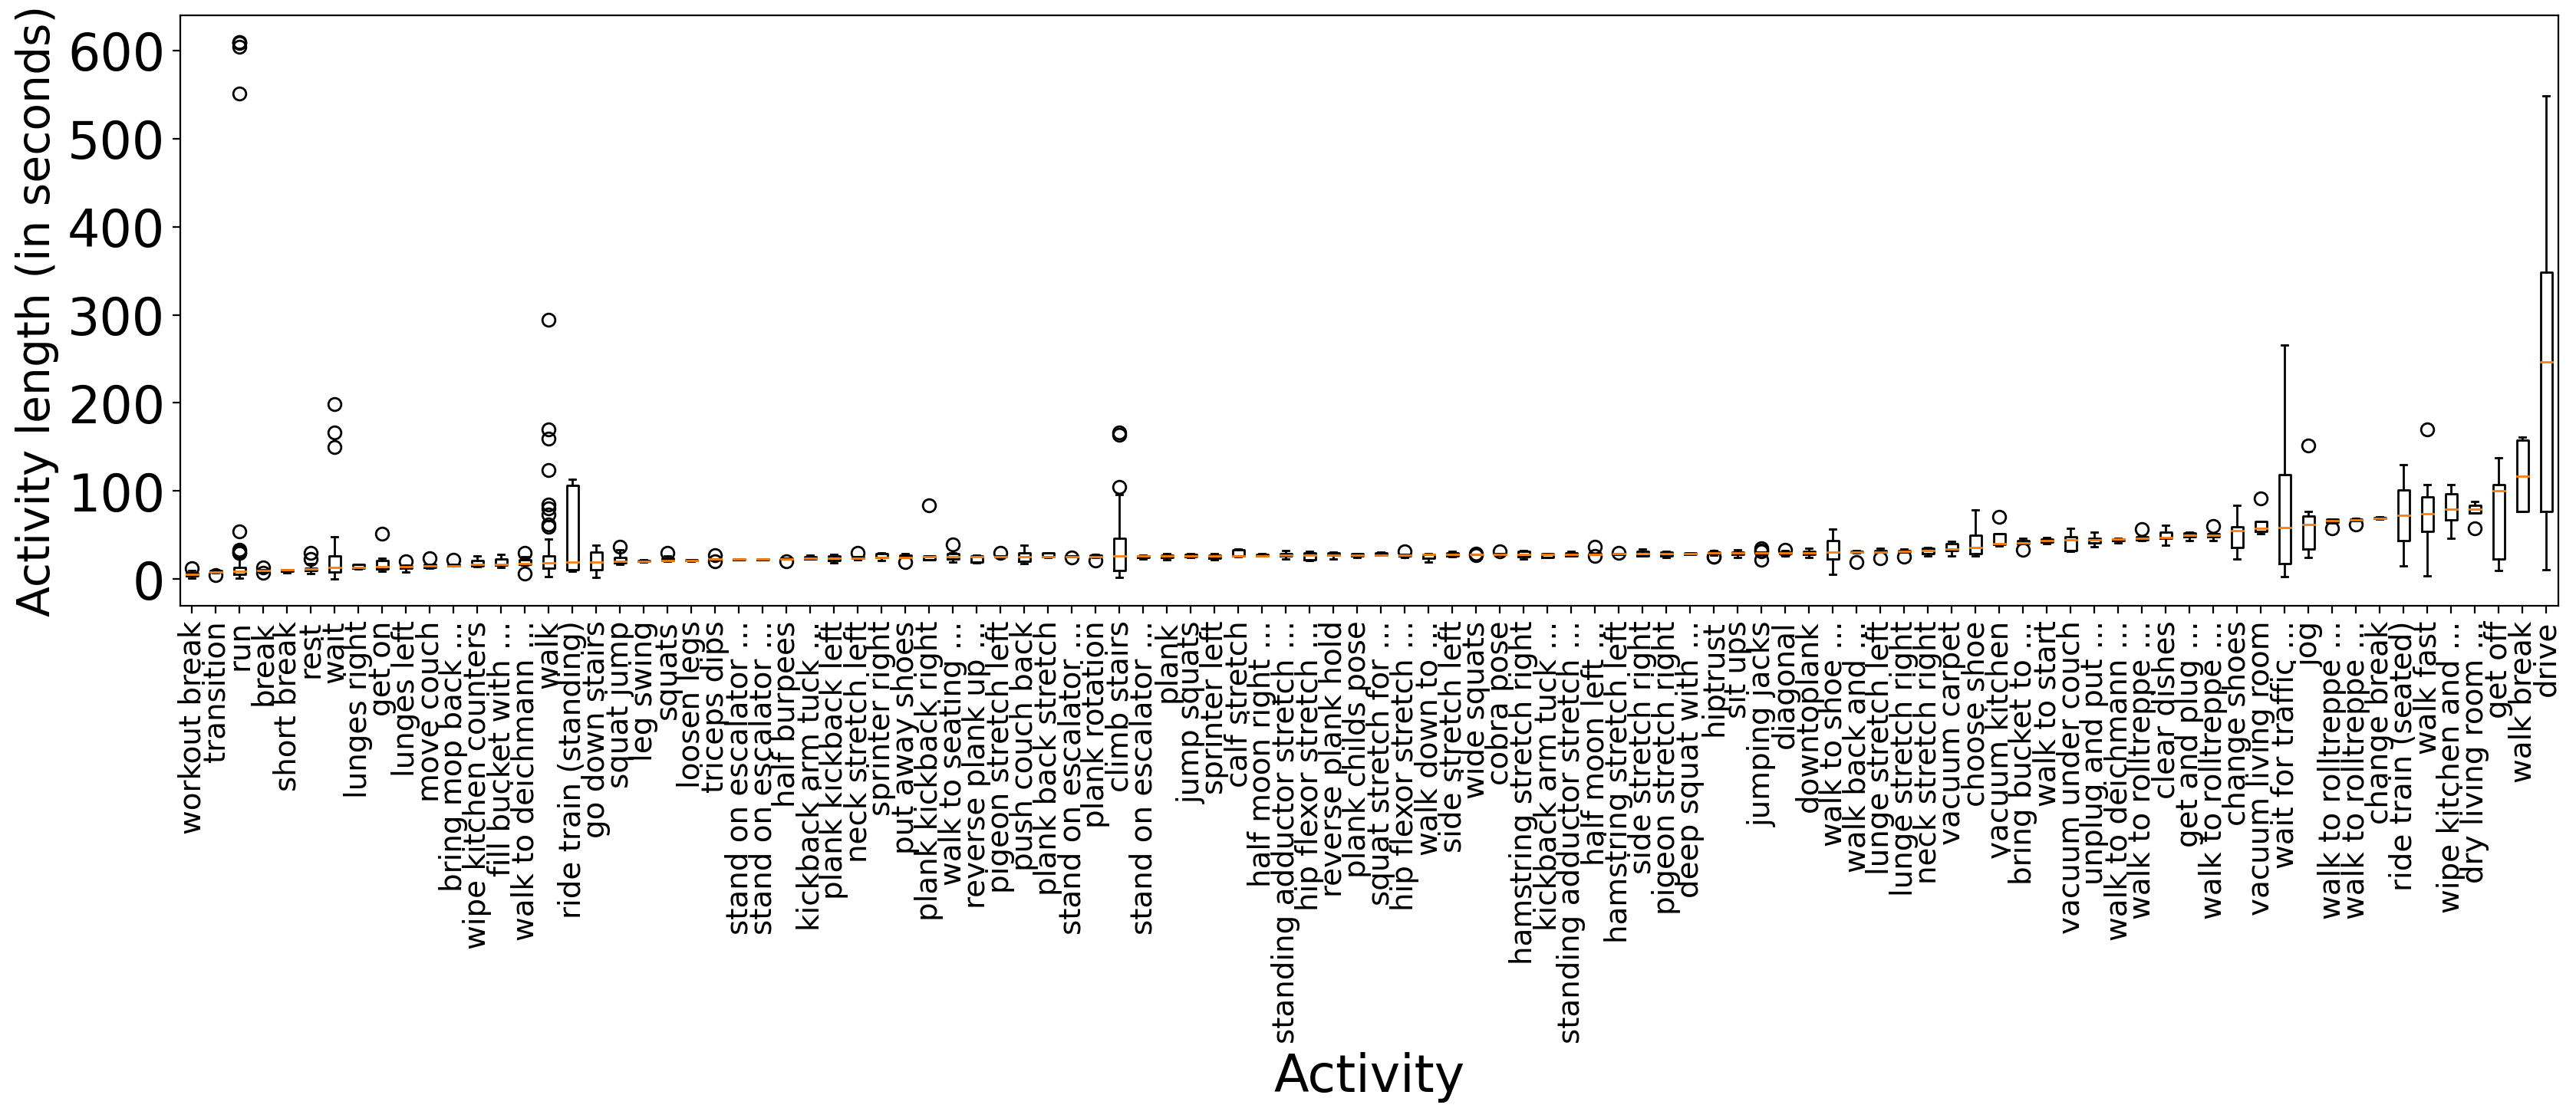

In [59]:
fontsize = 24
sample_rate = 50

activity_lengths = dict()

# compute activity lengths
for _, row in df.iterrows():
    cps = [0] + row.change_points.tolist() + [row["x-acc"].shape[0]]
    alens = np.diff(cps)

    for a, alen in zip(row.activities, alens):
        if a not in activity_lengths:
            activity_lengths[a] = list()

        activity_lengths[a].append(alen)

activities = []
short_names = {}

# compute activity names
for a in activity_lengths.keys():
    tokens = a.split(" ")

    if len(tokens) > 3:
        short_names[a] = f"{tokens[0]} {tokens[1]} {tokens[2]} ..."
    else:
        short_names[a] = a

    activities.append(a)

activities, alens = np.array(activities), np.array(list(activity_lengths.values()))
idxsort = np.argsort([np.median(x) for x in alens])

# plot activity lengths and names
_, ax = plt.subplots(1, figsize=(20,5))
ax.boxplot(alens[idxsort])

ax.set_xlabel("Activity", fontsize=fontsize)
ax.set_ylabel("Activity length (in seconds)", fontsize=fontsize-3)

ax.set_yticks(np.arange(0, 30_000+1, 5_000))
ax.set_yticklabels(labels=[f"{round(x/sample_rate)}" for x in np.arange(0, 30_000+1, 5_000)])

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_xticklabels([short_names[a] for a in activities[idxsort]], rotation=90, fontsize=14)

plt.show()

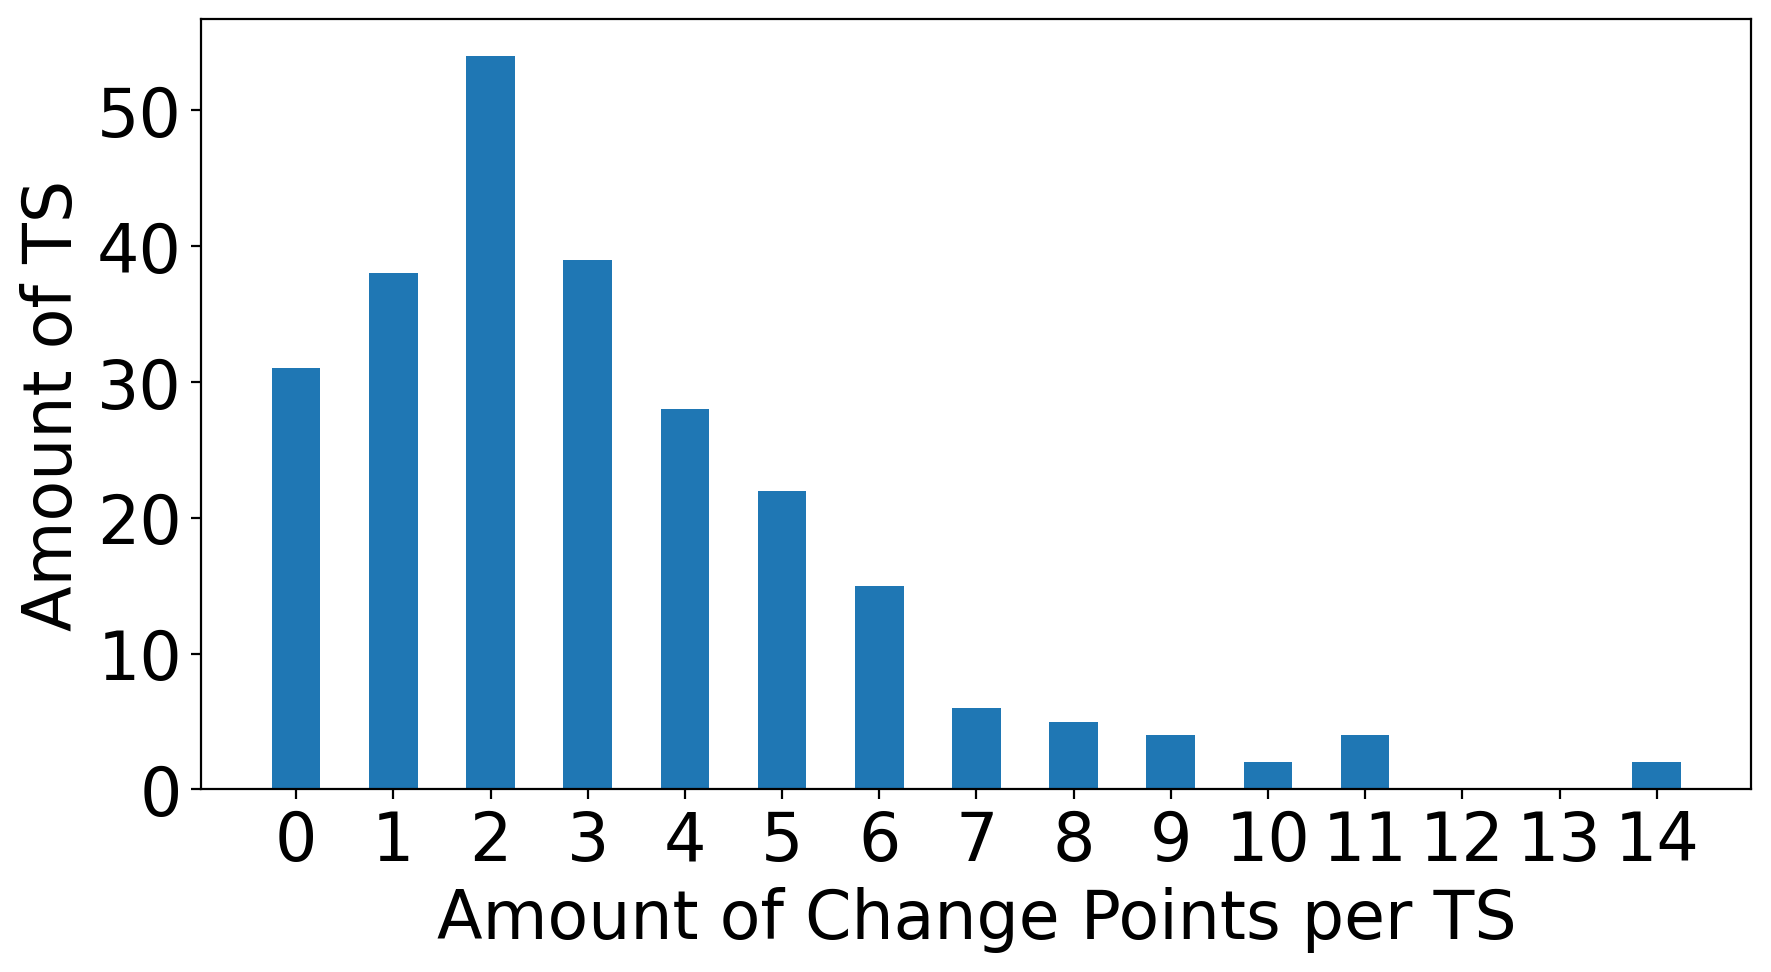

In [60]:
fontsize = 24

change_points, counts = np.unique(df.change_points.apply(len), return_counts=True)

_, ax = plt.subplots(1, figsize=(10,5))
ax.bar(change_points, counts, width=.5)

ax.set_xlabel("Amount of Change Points per TS", fontsize=fontsize)
ax.set_ylabel("Amount of TS", fontsize=fontsize)

ax.set_xticks(np.arange(0, 14+1, 1))

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.show()

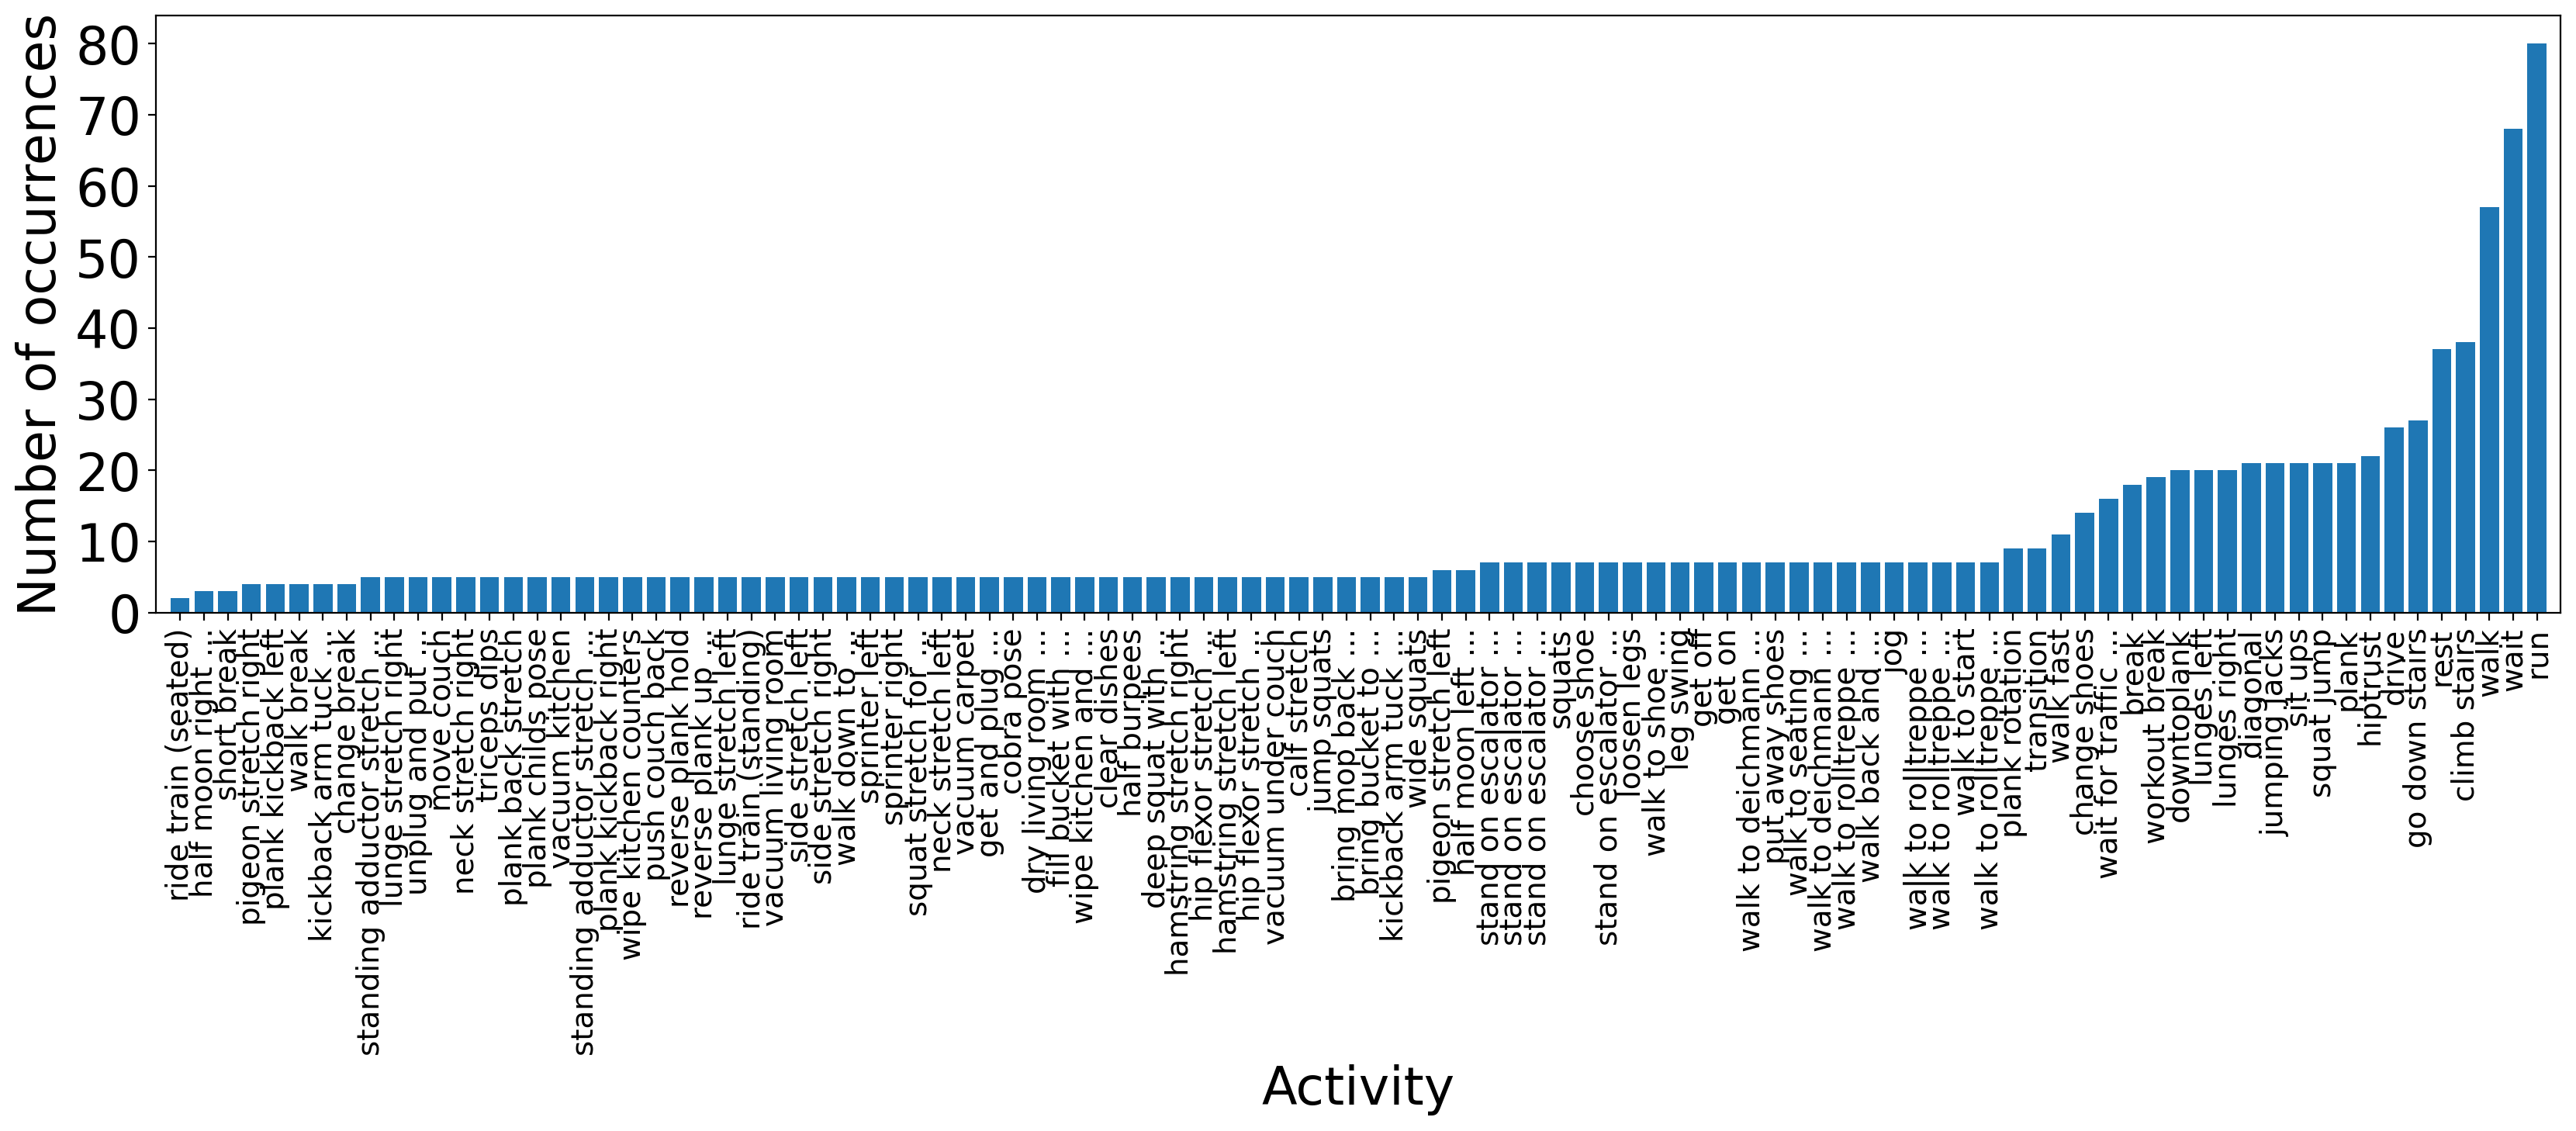

In [61]:
fontsize = 24

activities = []
short_names = {}

# compute activity names
for _, row in df.iterrows():
    for a in row.activities:
        tokens = a.split(" ")

        if len(tokens) > 3:
            short_names[a] = f"{tokens[0]} {tokens[1]} {tokens[2]} ..."
        else:
            short_names[a] = a

        activities.append(a)

# count activities
activities, counts = np.unique(activities, return_counts=True)
idxsort = np.argsort(counts)

# plot activity counts and names
_, ax = plt.subplots(1, figsize=(20,5))
ax.bar(np.arange(len(activities)), counts[idxsort])
ax.set_xlim(-1, len(activities))

ax.set_xlabel("Activity", fontsize=fontsize)
ax.set_ylabel("Number of occurrences", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_xticks(np.arange(len(activities)))
ax.set_xticklabels([short_names[a] for a in activities[idxsort]], rotation=90, fontsize=14)

plt.show()

Lastly, we show how to create the unlabelled data sets that were used in the challenge. To do this, we use a fixed, random reordering of the time series and remove all label information.

In [62]:
df_challenge = df.iloc[df.ts_challenge_id, 8:]
df_challenge["ts_id"] = np.arange(df_challenge.shape[0])
df_challenge.head()

,x-acc,y-acc,z-acc,x-gyro,y-gyro,z-gyro,x-mag,y-mag,z-mag,lat,lon,speed,ts_id
125,"[-3.0978999000000003, -3.219642, -3.219642, -3...","[-9.27045, -9.305766, -9.305766, -9.2204616521...","[0.2786040000000001, 0.31392000000000003, 0.31...",[],[],[],"[-1.5, -1.7301136363636365, -1.985795454545454...","[77.875, 77.97727272727273, 78.0909090909091, ...","[23.75, 24.056818181818183, 24.397727272727273...","[52.44669782, 52.44669782, 52.44669782, 52.446...","[13.52401674, 13.52401674, 13.52401674, 13.524...","[3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, ...",0
140,"[2.6702820000000003, 2.6702820000000003, 2.670...","[1.021221, 1.021221, 1.021221, 0.9035010000000...","[-8.913366, -8.913366, -8.913366, -9.266526, -...",[],[],[],"[-8.5, -8.5, -8.5, -8.53688524590164, -8.72131...","[-53.8125, -53.8125, -53.8125, -53.87397540983...","[146.375, 146.375, 146.375, 146.58811475409837...","[52.4466945, 52.4466945, 52.4466945, 52.446694...","[13.52398919, 13.52398919, 13.52398919, 13.523...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
93,"[-0.3797, -0.6382, -0.5721, -0.0146, 0.3839, 0...","[0.3849, 0.4039, 0.5278, 0.7082, 0.1433, -0.04...","[0.7816, 0.0699, -0.1079, -0.216, 0.1669, -0.5...","[-0.5705, -0.5705, -0.5705, -0.5705, -0.5645, ...","[0.9889, 0.9889, 0.9889, 0.9889, 0.9773, 0.977...","[1.3743, 1.3743, 1.3743, 1.3743, 1.392, 1.392,...","[-9.125, -9.125, -9.125, -15.5625, -15.5625, -...","[-63.5, -63.5, -63.5, -62.875, -62.875, -62.87...","[14.4375, 14.4375, 14.4375, 11.625, 11.625, 11...",[],[],[],2
52,"[4.5297, 4.5297, 5.6754, 5.6754, 2.8876, 2.887...","[5.7061, 5.7061, 4.0139, 4.0139, -1.1245, -1.1...","[0.6446, 0.6446, -0.337, -0.337, 1.4175, 1.417...","[2.5676, 2.5676, 1.9738, 1.9738, 1.8028, 1.802...","[-1.0166, -1.0166, 0.078, 0.078, -0.9409, -0.9...","[-0.8944, -0.8944, -0.7271, -0.7271, -0.3898, ...","[13.5193, 13.5193, 14.4272, 14.4272, 14.662177...","[-46.0938, -46.0938, -45.9549, -45.9549, -45.8...","[-3.6514, -3.6514, -1.857, -1.857, -1.32666666...",[],[],[],3
221,"[-3.9168714000000007, -4.790223, -4.4299651764...","[-10.9114668, -10.719387000000001, -10.5739681...","[-2.4107966000000007, -1.8060210000000003, -1....",[],[],[],"[22.5625, 22.3375, 22.1875, 22.1875, 22.1875, ...","[35.125, 35.875, 36.375, 36.375, 36.375, 36.37...","[27.875, 27.4625, 27.1875, 27.1875, 27.1875, 2...","[52.56552084, 52.56552084, 52.56552084, 52.565...","[13.42326009, 13.42326009, 13.42326009, 13.423...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4


Let's assert that this data matches the reference data in the datasets folder.

In [63]:
df_reference = load_data()

for row in range(df_reference.shape[0]):
    for col in range(df_reference.shape[1]):
        assert np.allclose(df_reference.iloc[row,].loc[df_reference.columns[col]], df_challenge.iloc[row,].loc[df_reference.columns[col]])